In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [28]:
from pathlib import Path
import numpy as np
import pandas as pd
from omegaconf import DictConfig
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from acctrack.task.plot_bad_tracks import PlotBadTracks
from acctrack.viewer import viewer

In [3]:
config = OmegaConf.load("../configs/task/plot_bad_tracks.yaml")
print(config.output_dir)
print(config.track_perf_path)

/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/Run100Evts/Results_GNN/bad_tracks
/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/Run100Evts/Results_GNN/tracks


In [25]:


evt_list = [
    24723, 24737, 24728, 24755, 24777, 24774, 24791, 24800, 24816, 24801,
    25724, 25737, 25752, 25776, 25767, 25788, 25813, 25801, 25835, 25833,
    26735, 26739, 26779, 26765, 26786, 26800, 26801, 26823, 26830, 26877,
    27654, 27659, 27672, 27676, 27680, 27688, 27703, 27739, 27754, 27779,
    30159, 30142, 30169, 30199, 30201, 30202, 30242, 30295, 30283, 30353,
    30668, 30662, 30693, 30697, 30689, 30714, 30725, 30755, 30812, 30810, 
    31162, 31161, 31170, 31194, 31186, 31213, 31228, 31239, 31256, 31278,
    31668, 31667, 31700, 31705, 31721, 31728, 31768, 31773, 31800, 31795, 
    32178, 32170, 32182, 32185, 32212, 32209, 32227, 32257, 32249, 32283, 
    32662, 32668, 32689, 32699, 32707, 32715, 32708, 32730, 32796, 32809
]

evtid = 24723
for idx,evt in enumerate(evt_list):
    if evt == evtid:
        evtidx = idx
        break
evtidx += 1

In [14]:
trk_perf_path = Path(config.track_perf_path)

trk_perf_fname = trk_perf_path / f"trackinfo_{evtid}.txt"

In [15]:
df = PlotBadTracks.read_track_perf_file(trk_perf_fname)

In [16]:
df[df['chi2/ndof'] > 100]

,idx,chi2/ndof,px,py,pz,pt,d0,z0,charge,qoverp,phi,theta,eta
19,30,116.425,4920.230,-3336.3700,53608.60,5944.74,0.985542,32.89800,-1,-0.000019,-0.595871,0.110440,2.895410
81,97,134.048,-873.425,-2443.3700,36628.40,2594.79,-1.373530,-62.20670,1,0.000027,-1.914108,0.070723,3.341718
105,123,113.523,-644.992,-878.9170,7752.58,1090.19,0.072810,28.25970,1,0.000128,-2.203880,0.139707,2.659728
125,143,253.373,-1212.440,-1019.0100,14222.20,1583.79,-0.036741,10.44680,1,0.000070,-2.442662,0.110903,2.891217
127,145,446.841,-1384.350,-1079.1400,15941.90,1755.27,-0.936395,-29.90950,-1,-0.000062,-2.479460,0.109662,2.902492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,1957,105.870,1222.680,-216.9560,915.50,1241.78,-0.274981,-41.27870,-1,-0.000648,-0.175615,0.935506,0.682914
1734,1970,592.055,1087.470,43.8763,-2709.46,1088.36,-1.083000,-81.00180,1,0.000342,0.040325,2.759631,-1.643320
1747,1983,2804.100,-401.161,1019.3300,-6698.41,1095.43,0.824469,-95.52530,-1,-0.000147,1.945733,2.979492,-2.510490
1754,1990,442.786,1067.090,1810.1400,-25244.50,2101.26,-0.295996,-43.49990,-1,-0.000039,1.038128,3.058548,-3.180946


# Read Track Candidates

In [17]:
gnn_track_candidates = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/Run100Evts/data/trackCandidates"
track_file = Path(gnn_track_candidates, f"tracks_{evtid}.txt")

In [21]:

trk_idx = 1983
idx = 0
tracks = None
with open(track_file, 'r') as f:
    for line in f:
        if idx == trk_idx:
            tracks = np.fromstring(line, sep=",")
            break
        idx += 1

print(tracks)

[ 15075.  16023.  15142.  15209.  46748.  46825.  46901. 110234.  57057.
  57094.  73187.  81346.  81374. 247879. 251904.]


# Read Spacepoints

In [26]:
evtinfo_path = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/Run100Evts/Results_CKF/inputDF"
evtinfo_file = Path(evtinfo_path, f"event{evtidx:09d}-truth.xz")
df_hits = pd.read_pickle(evtinfo_file)

In [30]:
df_track_hits = df_hits[df_hits['hit_id'].isin(tracks)]

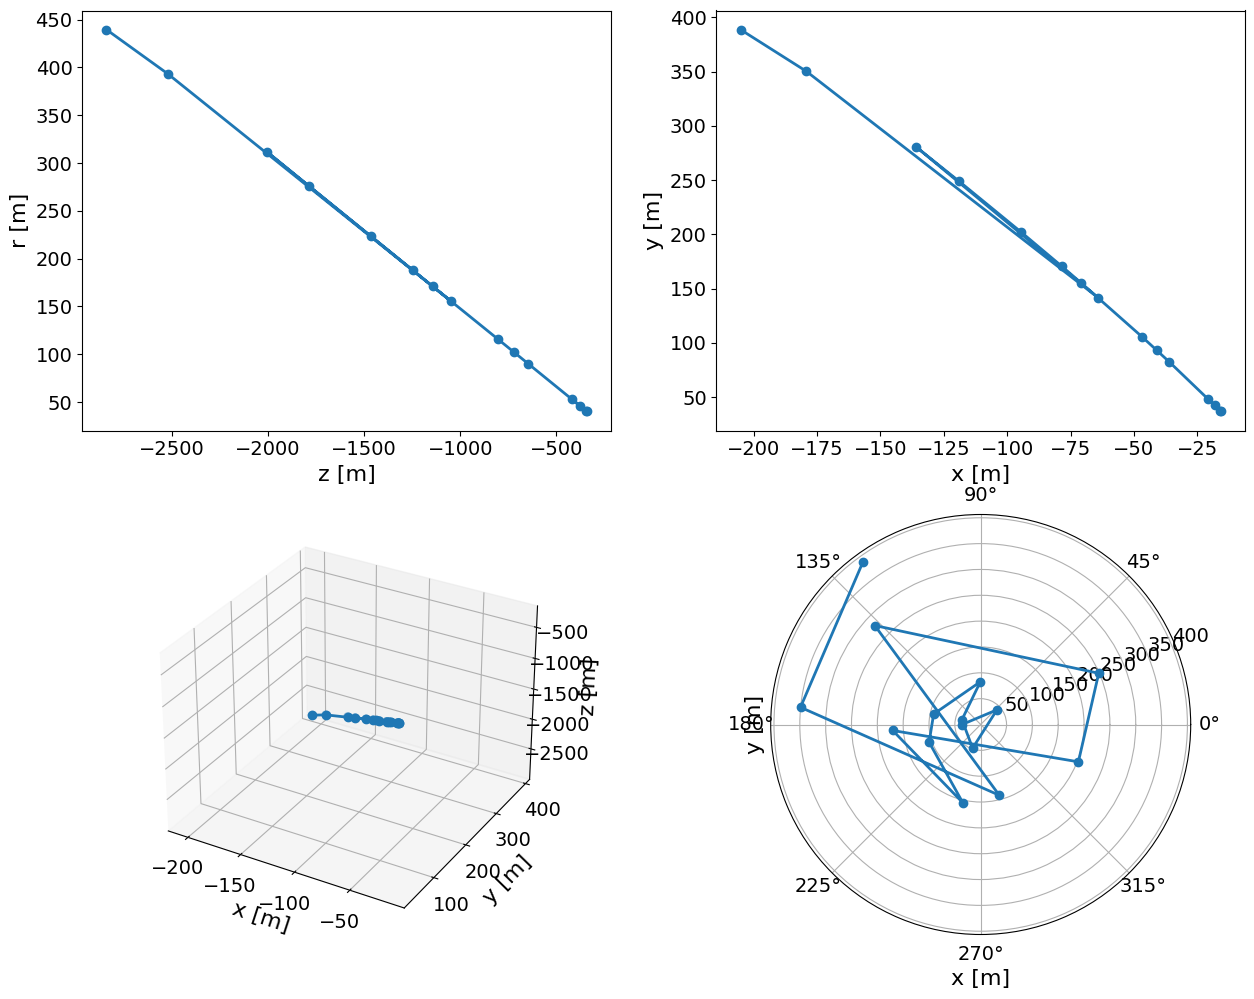

In [31]:


viewer.plot(df_track_hits[['x', 'y', 'z']].values, marker="o")



In [5]:
fname = config.output_dir + "/bad_tracks.parquet"
df = pd.read_parquet(fname)

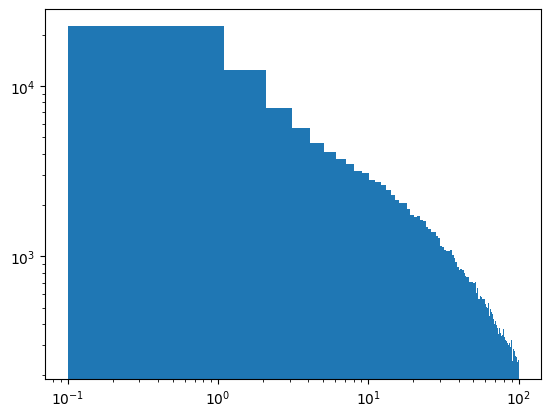

In [6]:
plt.xscale("log")
plt.hist(df['chi2/ndof'], bins=100, range=(0.1, 100), log=True);

In [8]:
df[df['chi2/ndof'] > 100]

,idx,chi2/ndof,px,py,pz,pt,d0,z0,charge,qoverp,phi,theta,eta
0,12,127.051,406.708,-81.7021,7352.98,414.833,-1.445480,96.188600,1,0.000136,-0.198248,0.056357,3.568927
9,22,109.601,840.662,-356.2350,17301.40,913.026,0.156997,-81.365700,-1,-0.000058,-0.400816,0.052723,3.635621
20,35,143.325,576.419,-544.5030,5284.86,792.933,0.002122,0.177938,1,0.000187,-0.756933,0.148928,2.595591
44,62,549.967,293.165,-1107.9600,14601.70,1146.090,0.398876,52.770900,-1,-0.000068,-1.312125,0.078330,3.239466
50,68,110.355,387.754,-719.9250,7445.20,817.707,-0.082979,83.287700,-1,-0.000134,-1.076745,0.109392,2.904970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173131,2485,554.396,1156.340,56.4270,-5327.03,1157.720,-0.384343,-54.977600,1,0.000183,0.048759,2.927591,-2.231093
173137,2491,600.391,-1442.800,1312.2700,-24587.90,1950.310,-1.578180,102.205000,1,0.000041,2.403537,3.062438,-3.228983
173157,2511,507.226,1497.270,617.2730,-19159.50,1619.520,-0.475015,-124.184000,-1,-0.000052,0.391035,3.057265,-3.165598
173158,2512,130.865,861.065,641.1700,-6062.47,1073.560,0.382199,-89.447000,1,0.000162,0.640052,2.966327,-2.432033


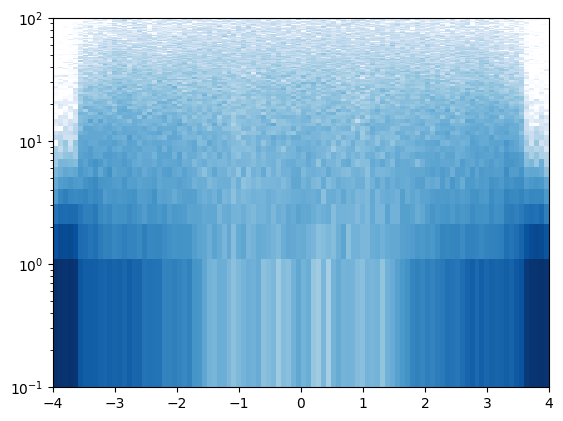

In [29]:
plt.hist2d(df['eta'], df['chi2/ndof'], range=((-4, 4), (0.1, 100)), 
           cmap='Blues', norm=colors.LogNorm());
plt.yscale("log")